In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

file_to_load = "cdata.csv"
df = pd.read_csv(file_to_load)

In [7]:
#使用df.sample()從資料集當中隨機取四個點
df_random=df.sample(n=4)
central_x=list(df_random['x'])
central_y=list(df_random['y'])

In [8]:
#首先這邊製作一個函數NearestCenter()，輸入四個central點，會以list的形式回傳每個central點與那些點最相近，並會用四種顏色區分，並作圖出來
def NearestCenter(df1,central_x,central_y):
    df1['p1']=''
    df1['p2']=''
    df1['p3']=''
    df1['p4']=''
    df1['dis']=''

    l=['p1','p2','p3','p4']
    #此迴圈計算每一個點與四個central點的距離
    for i in range(len(df1)):
        x_1=df1['x'][i]
        y_1=df1['y'][i]
        for j in range(4):
            x_2=central_x[j]
            y_2=central_y[j]
            dis=math.sqrt((x_2 - x_1) ** 2 + (y_2 - y_1) ** 2)
            df1[l[j]][i]=dis
    #剛剛已算出每一個點與四個central點的距離，而此迴圈是要針對每一個點判別四個距離中的最小值，並做分類
    for i in range(len(df1)):
        n1=[]
        n=0
        for j in range(4):
            if (j==0):
                n=df1[l[j]][i]
            if (n>df1[l[j]][i]):
                n=df1[l[j]][i]
            n1.append(df1[l[j]][i])
        df1['dis'][i]=n1.index(n)
    #判別四個距離中的最小值，使用list分類
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    x3=[]
    y3=[]
    x4=[]
    y4=[]
    for i in range(len(df1)):
        if (df1['dis'][i]==0):
            x1.append(df1['x'][i])
            y1.append(df1['y'][i])
    for i in range(len(df1)):
        if (df1['dis'][i]==1):
            x2.append(df1['x'][i])
            y2.append(df1['y'][i])
    for i in range(len(df1)):
        if (df1['dis'][i]==2):
            x3.append(df1['x'][i])
            y3.append(df1['y'][i])
    for i in range(len(df1)):
        if (df1['dis'][i]==3):
            x4.append(df1['x'][i])
            y4.append(df1['y'][i])
    #根據分類完後的list作圖，能看出與個別四個central最相近的點，使用顏色作區分
    plt.scatter(x1,y1,c="red",label='A')
    plt.scatter(x2,y2,c="green",label='B')
    plt.scatter(x3,y3,c="blue",label='C')
    plt.scatter(x4,y4,c="yellow",label='D')
    plt.scatter(central_x,central_y,c="black",label='Central',marker="x",s=100)
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    
    return x1,y1,x2,y2,x3,y3,x4,y4,central_x,central_y

In [9]:
#此函數是要利用NearestCenter()回傳的結果，再去算出每一個色區的重心，並回傳此計算出的重心座標
def ReadjustCenters(x1,y1,x2,y2,x3,y3,x4,y4):
    x1_sum=0
    y1_sum=0
    x2_sum=0
    y2_sum=0
    x3_sum=0
    y3_sum=0
    x4_sum=0
    y4_sum=0
    for i in range(len(x1)):
        x1_sum=x1_sum+x1[i]
        y1_sum=y1_sum+y1[i]
    for i in range(len(x2)):
        x2_sum=x2_sum+x2[i]
        y2_sum=y2_sum+y2[i]
    for i in range(len(x3)):
        x3_sum=x3_sum+x3[i]
        y3_sum=y3_sum+y3[i]
    for i in range(len(x4)):
        x4_sum=x4_sum+x4[i]
        y4_sum=y4_sum+y4[i]
    n1=x1_sum/len(x1)
    n2=y1_sum/len(y1)   
    n3=x2_sum/len(x2)   
    n4=y2_sum/len(y2)   
    n5=x3_sum/len(x3)   
    n6=y3_sum/len(y3)   
    n7=x4_sum/len(x4)   
    n8=y4_sum/len(y4)  
    central_x=[n1,n3,n5,n7]
    central_y=[n2,n4,n6,n8]

    plt.scatter(x1,y1,c="red",label='A')
    plt.scatter(x2,y2,c="green",label='B')
    plt.scatter(x3,y3,c="blue",label='C')
    plt.scatter(x4,y4,c="yellow",label='D')
    plt.scatter(central_x,central_y,c="black",label='Central',marker="x",s=100)
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    
    return central_x,central_y

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


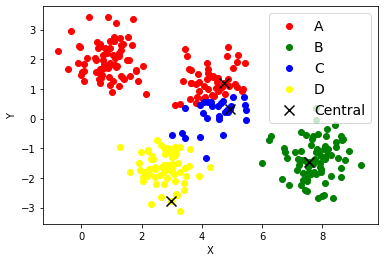

Round 1


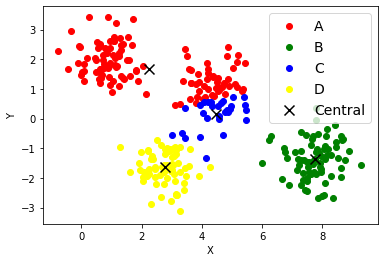

Round 2


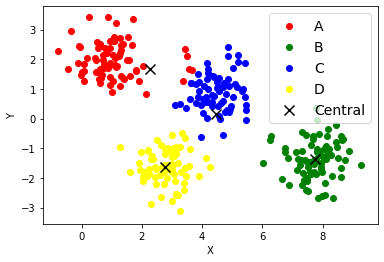

Round 3


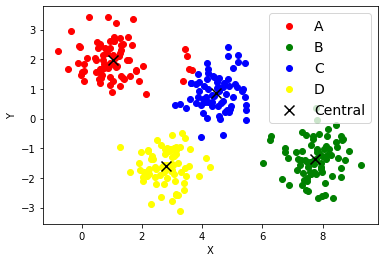

Round 4


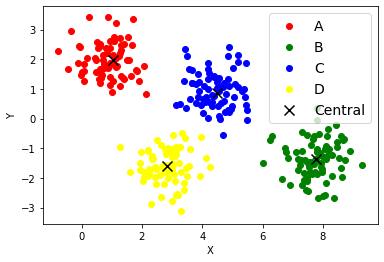

Round 5


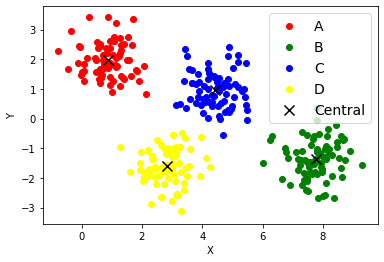

Round 6


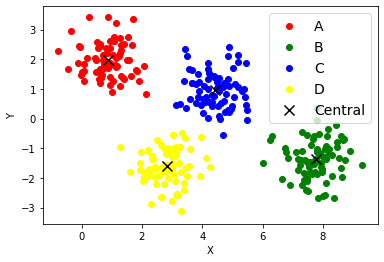

Round 7


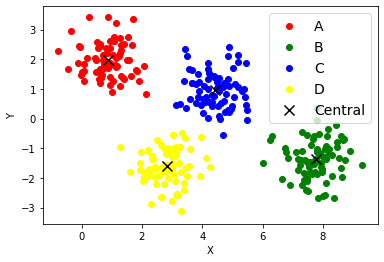

Round 8


In [10]:
i=0
#這邊的while敘述是要讓剛剛的兩個函數一直互相重複，NearestCenter()會針對central重新畫分顏色區塊，而ReadjustCenters()會針對劃分出的
#新的顏色區塊，個別計算出新的central值並回傳給NearestCenter()，一直重複此動作。而我設的終止條件是，只要central值沒有再移動，就跳出迴圈
while True:
    i=i+1
    x1,y1,x2,y2,x3,y3,x4,y4,n1,n2 = NearestCenter(df,central_x,central_y)
    print('Round',i)
    central_x,central_y = ReadjustCenters(x1,y1,x2,y2,x3,y3,x4,y4)
    i=i+1
    print('Round',i)
    if (n1==central_x or n2==central_y):
        break